In [3]:
from acquire import get_titanic_data
from prepare import prep_titanic_data

df = prep_titanic_data(get_titanic_data())

In [5]:
df.head()

df.dropna(inplace=True)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

In [11]:
# 1. make the thing
scaler = MinMaxScaler()

# 2. fit the thing
scaler.fit(train[['age', 'fare']])

# 3. use the thing
train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [8]:
train.head(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
866,866,1,2,female,0.374378,1,0,0.027050,C,Second,Cherbourg,0,0
864,864,0,2,male,0.331722,0,0,0.025374,S,Second,Southampton,1,3
79,79,1,3,female,0.417034,0,0,0.024350,S,Third,Southampton,1,3
259,259,1,2,female,0.701408,0,1,0.050749,S,Second,Southampton,0,3
698,698,0,1,male,0.687189,1,1,0.216430,C,First,Cherbourg,0,0


In [12]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(train[['pclass','age','fare','sibsp','parch']], train.survived)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
logit.predict(train[['pclass','age','fare','sibsp','parch']])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
logit.predict_proba(train[['pclass','age','fare','sibsp','parch']])

array([[0.62131443, 0.37868557],
       [0.52532971, 0.47467029],
       [0.7761312 , 0.2238688 ],
       ...,
       [0.77320172, 0.22679828],
       [0.70842814, 0.29157186],
       [0.61423106, 0.38576894]])

In [16]:
train['prediction'] = logit.predict(train[['pclass','age','fare','sibsp','parch']])

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


number of times we got it right / total # of observations

In [19]:
(train.survived == train.prediction).sum() / train.shape[0]

0.7046728971962617

In [20]:
logit.score(train[['pclass','age','fare','sibsp','parch']], train.survived)

0.7046728971962617

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train.survived, train.prediction)

array([[270,  50],
       [108, 107]])

In [41]:
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Thus in binary classification, the count of true negatives is C 0,0,
# false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

df = pd.DataFrame(confusion_matrix(train.survived, train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

df

,Pred -,Pred +
Actual -,270,50
Actual +,108,107


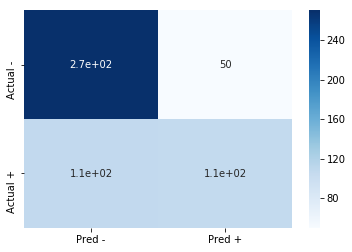

In [45]:
%matplotlib inline
import seaborn as sns

sns.heatmap(df, cmap='Blues', annot=True)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(train.survived, train.prediction))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       320
           1       0.68      0.50      0.58       215

   micro avg       0.70      0.70      0.70       535
   macro avg       0.70      0.67      0.67       535
weighted avg       0.70      0.70      0.69       535



In [29]:
train.survived.value_counts()

0    320
1    215
Name: survived, dtype: int64

In [31]:
train.prediction.value_counts()

0    378
1    157
Name: prediction, dtype: int64